---
### On Brownian Motion
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

---
#### I. Definition

> Let $W = \{W_t,\ t \in \mathbb{R}_+\}$ be a stochastic process on the probability space $(\Omega, \mathcal{F}, \mathbb{P})$. $W$ is a **standard Brownian motion** if:
> 
> - (i) $W_0 = 0$ and the sample paths $W_\cdot(\omega)$ are continuous for almost every $\omega \in \Omega$,
> 
> - (ii) $W$ has independent increments: for all $0 \leq t_1 < t_2 \leq t_3 < t_4$,
> 
>   $$
>   W_{t_4} - W_{t_3} \quad \text{and} \quad W_{t_2} - W_{t_1} \quad \text{are independent},
>   $$
> 
> - (iii) For all $0 \leq s < t$, the increment $W_t - W_s$ is normally distributed:
> 
>   $$
>   W_t - W_s \sim \mathcal{N}(0,\ t - s).
>   $$

---
#### II. Implementation

We want to simulate a path of standard Brownian motion $W_t$ over a time interval $[0, T]$.

**Step 1**: Define the simulation parameters  
- Choose the total time horizon $T$ (e.g., $T = 1.0$).
- Choose the number of discrete time steps $N$ (e.g., $N = 1000$).
- Compute the time increment:  
  $$
  \Delta t = \frac{T}{N}
  $$

**Step 2**: Create the time grid  
- Create an array of $N+1$ equally spaced time points:
  $$
  t_0 = 0,\ t_1 = \Delta t,\ t_2 = 2\Delta t,\ \dots,\ t_N = T
  $$
- This grid represents the points at which we will evaluate the Brownian path.

**Step 3**: Generate the Brownian increments  
- For each of the $N$ time intervals, simulate a random increment:
  - Draw $N$ i.i.d. standard normal variables: $Z_i \sim \mathcal{N}(0, 1)$
  - Scale them to have variance $\Delta t$:
    $$
    dW_i = \sqrt{\Delta t} \cdot Z_i \sim \mathcal{N}(0, \Delta t)
    $$
- These $dW_i$ are the simulated **Brownian increments**: $W_{t_i} - W_{t_{i-1}} = dW_i$

**Step 4**: Compute the Brownian path  
- Initialize $W_0 = 0$.
- Construct the Brownian path recursively:
  $$
  W_{t_1} = W_0 + dW_1,\quad W_{t_2} = W_{t_1} + dW_2,\quad \dots,\quad W_{t_N} = W_{t_{N-1}} + dW_N
  $$
  $$
  \Longleftrightarrow
  W_{t_i} = W_0 + \sum_{j=1}^{i} dW_j
  $$
- The final result is an array of $N+1$ values, one for each time point in the grid.

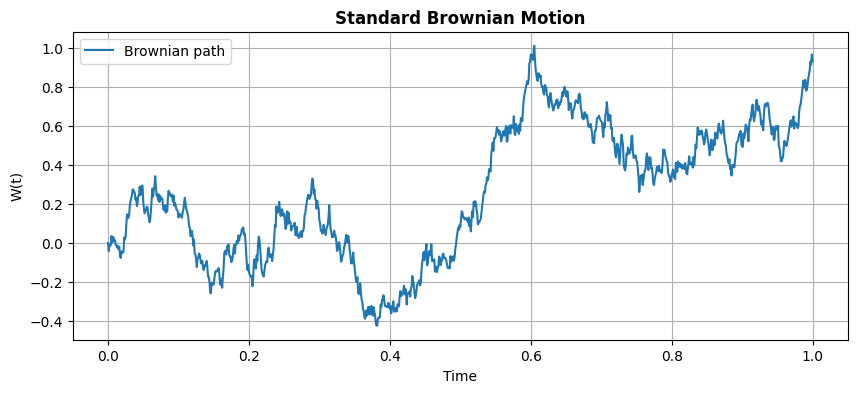

In [36]:
# Step 1, 2: Simulation parameters
T = 1.0                          # Total time
N = 1000                         # Number of steps
dt = T / N                       # Time step
t = np.linspace(0, T, N+1)       # Time grid: [0, Δt, 2Δt, ..., T]

# Step 3: Brownian increments
np.random.seed(7887)
dW = np.sqrt(dt) * np.random.randn(N)  # Increments ~ N(0, Δt)

# Step 4: Brownian path
W = np.insert(np.cumsum(dW), 0, 0)     # W₀ = 0

# Step 4: Plot the path
plt.figure(figsize=(10, 4))
plt.plot(t, W, label='Brownian path')
plt.title('Standard Brownian Motion', fontweight='bold')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.legend()
plt.show()

---
#### III. Brownian motion as a Gaussian process

Brownian motion is the most classical and fundamental example of a **Gaussian process**. Before formally stating its properties, we briefly recall what a Gaussian process is and how it generalizes the concept of Gaussian distributions.

> A **Gaussian process** is a collection of random variables $\{X_t\}_{t \geq 0}$ such that every finite collection $(X_{t_1}, \dots, X_{t_n})$ is a **Gaussian vector**, i.e., a vector whose linear combinations follow a Gaussian distribution.

This builds on three levels of generalization:

- A **Gaussian distribution** refers to a single random variable $X \in \mathbb{R}$ with density:
  $$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{(x - \mu)^2}{2\sigma^2} }, \quad \text{with } \sigma > 0.
  $$

- A **Gaussian vector** $(X_1, \dots, X_n)$ is such that for any $(a_1, \dots, a_n) \in \mathbb{R}^n$, the linear combination $\sum_{i=1}^n a_i X_i$ is Gaussian.

- A **Gaussian process** $(X_t)_{t \geq 0}$ is a stochastic process where every finite subcollection $(X_{t_1}, \dots, X_{t_n})$ forms a Gaussian vector for any $n \geq 1$ and any times $0 \leq t_1 < t_2 < \dots < t_n$.

We now turn to Brownian motion and show that it fits exactly this definition.

> **Proposition**
> 
> The Brownian motion is a **centered** Gaussian process with covariance function:  
> $$
> c(s, t) = \mathbb{E}[W_s W_t] = t \wedge s.
> $$
> Conversely, any **continuous** centered Gaussian process with $c$ as covariance function is a Brownian motion.

This proposition highlights a key point: Brownian motion is fully characterized by its mean (zero) and its covariance function $c(s, t) = \min(s, t)$.

> **Corollary**
>
> Let $W$ be a standard Brownian motion, $t_0 > 0$, and $c > 0$. Then, so are the processes:
> 
> - *Symmetry*: $\{-W_t,\ t \geq 0\}$,
> - *Scaling*: $\left\{\frac{1}{\sqrt{c}} W_{ct},\ t \geq 0\right\}$,
> - *Time translation*: $\{W_{t_0 + t} - W_{t_0},\ t \geq 0\}$,
> - *Time reversal*: $\{W_{T - t} - W_T,\ 0 \leq t \leq T\}$.

These transformations preserve the Gaussian and Brownian structure of the process.

---
#### IV. Quadratic Variation

The Brownian motion has continuous trajectories but they are quite *irregular*... Note $\pi := \{t_1 = 0, \dots, t_n = T\}$ a discrete grid of $[0, T]$ and:
$$
|\pi| := \max_i (t_i - t_{i-1})
$$

> **Definition & Property**
>
> The quadratic variation of $W$ on $[0, T]$ is the limit, which exists in $L^2(\Omega, \mathcal{A}, \mathbb{P})$,
> 
> $$
> ⟨W⟩_T = \lim_{|\pi| \to 0} \sum_i \left(W_{t_{i+1}} - W_{t_i}\right)^2 = T
> $$

To better understand this property, we are now going to verify it empirically. By simulating a Brownian motion and computing the cumulative sum of squared increments over partitions of $[0, T]$ with increasing resolution, we observe how the discrete approximation of the quadratic variation converges to $t \mapsto t$. This convergence illustrates numerically that $\langle W \rangle_T = T$, confirming the theoretical result through simulation.

In [37]:
def simulate_brownian_motion(T, N, seed=7887):
    """
    Function to simulate a Brownian motion over [0, T] with N steps.
    """
    dt = T / N                             # Time step Δt
    t = np.linspace(0, T, N + 1)           # Time grid: [0, Δt, 2Δt, ..., T]
    np.random.seed(seed)                   # For reproducibility
    dW = np.sqrt(dt) * np.random.randn(N)  # Brownian increments ~ N(0, Δt)
    W = np.insert(np.cumsum(dW), 0, 0)     # W₀ = 0, then cumulative sum
    return t, W

def quadratic_variation(W):
    """
    Function to compute empirical quadratic variation.
    """
    return np.cumsum(np.diff(W)**2)        # Sum of squared increments

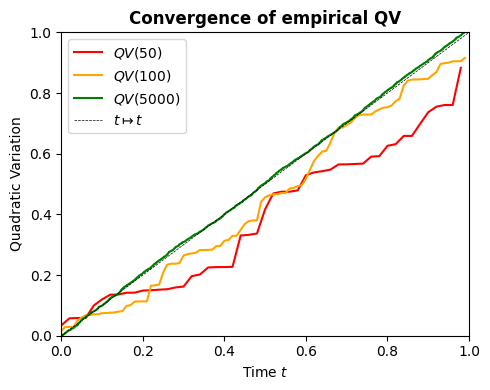

In [42]:
# Simulation settings
T = 1.0
partitions = [50, 100, 5000]               # Different grid resolutions
colors = ['red', 'orange', 'green']

plt.figure(figsize=(5, 4))

# Loop through different partition sizes
for N, color in zip(partitions, colors):
    t, W = simulate_brownian_motion(T, N)
    qv = quadratic_variation(W)
    plt.plot(t[:-1], qv, label=f'$QV({N})$', color=color)

# Plot the theoretical limit line: ⟨W⟩ₜ = t
t_ref = np.linspace(0, 1, 100)
plt.plot(t_ref, t_ref, 'k--', label='$t \\mapsto t$', linewidth=0.5)

# Formatting
plt.title('Convergence of empirical QV', fontweight='bold')
plt.xlabel('Time $t$')
plt.ylabel('Quadratic Variation')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

To conclude, it's important to distinguish between different types of variation when analyzing functions and stochastic processes. A function is said to have **finite variation** on $[0, T]$ if the sum of the absolute increments over all partitions remains bounded. Many classical functions (e.g., monotone or continuously differentiable functions) satisfy this, and for $f \in C^1$, we even have an exact expression:
$$
\mathcal{V}_T(f) = \int_0^T |f'(s)| \, \mathrm{d}s.
$$

In contrast, the **quadratic variation** captures the roughness of a path by summing **squared** increments. Any continuous process with finite variation has zero quadratic variation, meaning it cannot accumulate "roughness" in this sense.

Brownian motion stands apart: it has **infinite first-order variation** but **finite quadratic variation**. Its paths are continuous yet so irregular that they are **nowhere differentiable**, and their total variation diverges.